In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy # 과학기술, 공학용 패키지(배열, 특수함수)
# scipy.special.expit(), scipy.special.softmax() 함수

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, classification_report 

# Data Import

In [ ]:
fish_file = 'https://github.com/JakeOh/202011_itw_bd21/raw/main/datasets/Fish.csv'

In [ ]:
df = pd.read_csv(fish_file)

In [ ]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [ ]:
np.unique(df['Species'])
# df['Species'].value_counts()

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

# 이진 분류(binary-class classification)

In [ ]:
# df에서 Bream, Smelt 어종만 선택
bream_smelt = df[(df['Species'] == 'Bream') | (df['Species'] == 'Smelt')]

In [ ]:
bream_smelt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  49 non-null     object 
 1   Weight   49 non-null     float64
 2   Length1  49 non-null     float64
 3   Length2  49 non-null     float64
 4   Length3  49 non-null     float64
 5   Height   49 non-null     float64
 6   Width    49 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.1+ KB


## DF -> Array 

In [ ]:
# data 
X = bream_smelt[['Weight', 'Length2', 'Height', 'Width']].to_numpy()  # values 
# target
y = bream_smelt['Species'].values

In [ ]:
X[:5]

array([[242.    ,  25.4   ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  12.444 ,   5.134 ]])

In [ ]:
y.shape

(49,)

In [ ]:
y[:5]

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

## train/test 분리

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.25,
                                                   stratify=y,
                                                   random_state=42)

In [ ]:
X_train.shape

(36, 4)

In [ ]:
y_train.shape

(36,)

## kNN 분류

### 특성 스케일링

In [ ]:
std_scaler = StandardScaler()  # z = (x - mu) / std

In [ ]:
# 훈련 셋에서 특성들의 평균과 표준편차를 찾고(fit), 특성들의 스케일을 변환(transform)
X_train_scaled = std_scaler.fit_transform(X_train)

In [ ]:
# 훈련 셋에서 찾은 평균과 표준편차를 사용해서, 테스트 셋의 특성들의 스케일을 변환(transform)
X_test_scaled = std_scaler.transform(X_test)

In [ ]:
np.mean(X_train_scaled, axis=0)

array([-8.94346325e-17, -5.24271984e-17,  1.29526020e-16,  5.48943607e-16])

In [ ]:
np.std(X_train_scaled, axis=0)

array([1., 1., 1., 1.])

### 모델 생성, 훈련

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=5)  # 모델 생성

In [ ]:
knn_clf.fit(X_train_scaled, y_train)  # 모델 학습

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
train_pred = knn_clf.predict(X_train_scaled)
train_pred

array(['Bream', 'Bream', 'Smelt', 'Bream', 'Smelt', 'Bream', 'Smelt',
       'Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Smelt', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream', 'Smelt',
       'Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream'], dtype=object)

In [ ]:
y_train

array(['Bream', 'Bream', 'Smelt', 'Bream', 'Smelt', 'Bream', 'Smelt',
       'Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Smelt', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream', 'Smelt',
       'Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream'], dtype=object)

In [ ]:
knn_clf.score(X_train_scaled, y_train)

1.0

In [ ]:
# kNN 분류기는 가장 가까운 k개의 이웃들의 어종의 비율로 예측 
knn_clf.predict_proba(X_train_scaled)  # predict probability(예측 확률)

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
# 테스트 셋의 예측 확률 
knn_clf.predict_proba(X_test_scaled)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

# 다중 클래스 분류(multi-class classification)

In [ ]:
X = df[['Weight', 'Length2', 'Width', 'Height']].to_numpy()
y = df['Species'].values

In [ ]:
X.shape

(159, 4)

In [ ]:
y.shape

(159,)

## train/test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    stratify=y, 
                                                    random_state=42)

In [ ]:
std_scaler = StandardScaler()

In [ ]:
# 특성 스케일링
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

## 모델 훈련, 평가

In [ ]:
knn_clf = KNeighborsClassifier()  # 모델 생성

In [ ]:
knn_clf.fit(X_train_scaled, y_train)  # 모델 학습

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
knn_clf.score(X_train_scaled, y_train)  # 훈련 셋의 정확도

0.8403361344537815

In [ ]:
train_pred = knn_clf.predict(X_train_scaled)  # 훈련 셋의 예측값
train_pred[:10]

array(['Perch', 'Perch', 'Bream', 'Bream', 'Perch', 'Perch', 'Perch',
       'Bream', 'Perch', 'Parkki'], dtype=object)

In [ ]:
y_train[:10]   # 실제값(타겟)

array(['Roach', 'Perch', 'Bream', 'Bream', 'Perch', 'Perch', 'Perch',
       'Bream', 'Whitefish', 'Bream'], dtype=object)

In [ ]:
# 훈련 셋의 예측 확률 
train_prob = knn_clf.predict_proba(X_train_scaled)
train_prob[:3]

array([[0. , 0. , 0.6, 0. , 0.4, 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. ]])

In [ ]:
np.unique(y)

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [ ]:
train_prob[7:10]

array([[1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.4, 0. , 0.2, 0. , 0.4],
       [0.4, 0.6, 0. , 0. , 0. , 0. , 0. ]])

# sigmoid 함수


$\phi (z) = \dfrac{e^z}{1 + e^z} = \dfrac{1}{1+ e^{-z}}$

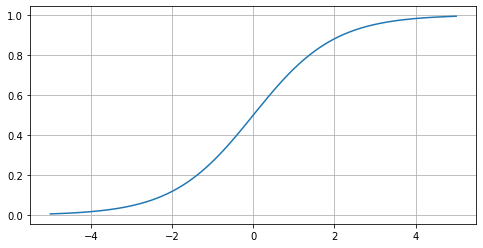

In [ ]:
z = np.arange(-5, 5, 0.001)
# sigmoid = 1 / (1 + np.exp(-z))
sigmoid = scipy.special.expit(z)

plt.figure(figsize=(8, 4))
plt.plot(z, sigmoid)

plt.grid()
plt.show()

## Logistic Regression

Logistic Regression = Linear Regression + Sigmoid 함수 => 확률 추정 

선형 회귀
> $ z = w_0 + \sum_{i} x_i \cdot w_i = w_0 + x_1 w_1 + x_2 w_2 + ...$

Sigmoid 함수 
> $ \phi (z) = \dfrac{1}{1 + exp(-z)} = \dfrac{1}{1 + exp(-(w_0 + \sum_{i} x_i \cdot w_i))}$

## 이진 분류

In [85]:
# 이진 분류(도미-빙어 분류)를 위한 데이터 셋 
X2 = bream_smelt[['Weight', 'Length2', 'Height', 'Width']].to_numpy()
y2 = bream_smelt['Species'].values

In [92]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2,
                                                 test_size=0.25,
                                                 stratify=y2,
                                                 random_state=42)

In [93]:
# 특성 스케일링
std_scaler = StandardScaler()
X2_train_scaled = std_scaler.fit_transform(X2_train)
X2_test_scaled = std_scaler.transform(X2_test)

In [94]:
# 모델 생성
logi_reg = LogisticRegression()

In [96]:
# 모델 학습
logi_reg.fit(X2_train_scaled, y2_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [98]:
# 훈련 셋 평가(훈련 셋 정확도)
logi_reg.score(X2_train_scaled, y2_train)

1.0

In [100]:
# 훈련 셋 예측값 
train_pred = logi_reg.predict(X2_train_scaled)
train_pred[:5]

array(['Bream', 'Bream', 'Smelt', 'Bream', 'Smelt'], dtype=object)

In [102]:
# 훈련 셋 예측 확률 
train_prob = logi_reg.predict_proba(X2_train_scaled)
train_prob[:5]

array([[0.99658483, 0.00341517],
       [0.94925795, 0.05074205],
       [0.05162043, 0.94837957],
       [0.97980465, 0.02019535],
       [0.05195248, 0.94804752]])

In [107]:
# logistic regression 모델은 선형 회귀식의 절편(intercept)과 계수들(coefficients)을 찾음 
w0 = logi_reg.intercept_  # w0: intercept 
w0

array([-2.58949738])

In [108]:
W = logi_reg.coef_  # w1, w2, w3, w4: coefficients
W

array([[-0.67328207, -0.95804651, -1.03655457, -0.97063164]])

In [109]:
x0 = X2_train_scaled[0]
x0

array([0.85382543, 0.79935928, 0.8021994 , 0.94206579])

In [112]:
# 선형 계수로 z 값을 찾고 이를 sigmoid 함수에 넣으면 확률을 찾을 수 있다
z0 = w0 + x0 @ W[0]   # z = w0 + x1*w1 + x2*w2 + x3*w3 + x4*w4 
z0

array([-5.67610842])

In [113]:
# 첫번재 row가 smelt가 될 확률
p_smelt = scipy.special.expit(z0) # sigmoid(z): 어종이 빙어(smelt)일 확률
p_smelt

array([0.00341517])

In [115]:
p_bream = 1 - p_smelt  # 어종이 도미(bream)일 확률 
p_bream

array([0.99658483])

In [116]:
# 결정 함수(decision function) 
decision = logi_reg.decision_function(X2_train_scaled)
decision[:5]

array([-5.67610842, -2.92892559,  2.91083732, -3.88190064,  2.90407516])

### 테스트 셋 평가 

In [121]:
logi_reg.score(X2_test_scaled, y2_test)

1.0

In [127]:
# 예측 확률
np.around(logi_reg.predict_proba(X2_test_scaled), decimals=3)

array([[0.997, 0.003],
       [0.992, 0.008],
       [0.999, 0.001],
       [0.111, 0.889],
       [0.063, 0.937],
       [0.991, 0.009],
       [0.056, 0.944],
       [0.992, 0.008],
       [0.043, 0.957],
       [0.998, 0.002],
       [0.96 , 0.04 ],
       [0.988, 0.012],
       [0.981, 0.019]])

In [130]:
# 테스트 셋 예측값
logi_reg.predict(X2_test_scaled)

array(['Bream', 'Bream', 'Bream', 'Smelt', 'Smelt', 'Bream', 'Smelt',
       'Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

## 다중 클래스 분류 

In [133]:
X_train_scaled.shape, X_test_scaled.shape

((119, 4), (40, 4))

In [134]:
y_train.shape, y_test.shape

((119,), (40,))

In [135]:
np.unique(y_train)

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [136]:
np.unique(y_test)

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [169]:
# Logistic Regression 모델 생성 
logi_reg = LogisticRegression()

In [170]:
# 모델 학습 
logi_reg.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [171]:
# 모델 평가 - 훈련 셋 정확도
logi_reg.score(X_train_scaled, y_train)

0.8067226890756303

### 다중 클래스 분류의 계수들(coefficients)

In [172]:
# intercepts
w0 = logi_reg.intercept_
w0   # shape: (7,)

array([ 0.39664378, -0.13713512,  2.15457647,  0.09210402,  0.86396   ,
       -3.69161117,  0.32146202])

In [173]:
# coefficients
W = logi_reg.coef_
W  # shape: (7, 4)

array([[-0.05355772,  0.00312737, -0.20525144,  3.07704586],
       [-0.52395515, -0.94082901, -0.90437914,  1.72924854],
       [ 0.8797936 , -0.64969844,  1.87114965, -1.85475732],
       [ 0.27171666,  2.77543889, -0.67597667, -1.31548629],
       [-0.85512169, -0.2716576 ,  0.74669802, -0.31272212],
       [-0.38751227, -0.85648863, -1.63452753, -1.39224863],
       [ 0.66863658, -0.05989258,  0.80228711,  0.06891995]])

In [182]:
np.unique(y_train)

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [174]:
x0 = X_train_scaled[0]  # 훈련 셋에서 첫번재 물고기 샘플 
x0

array([-0.75628803, -0.66065677, -0.45043644, -0.78015159])

In [175]:
z_bream = w0[0] + x0 @ W[0]  # 선형 회귀식에서 계산된 값
# 1 + (4,) # (4,)
z_bream

-1.8730267786194

In [176]:
s_bream = np.exp(z_bream)  
s_bream

0.15365786889244462

In [187]:
z = []
s = [] 
for i in range(7):
    z_i = w0[i] + x0 @ W[i]
    z.append(z_i)
    s.append(np.exp(z_i))


In [188]:
z  #> logistic regression 모델의 decision_function 

[-1.8730267786194,
 -0.06101973450214905,
 2.5225846534637473,
 -0.6162412730854646,
 1.5977813911658596,
 -1.0102795072808588,
 -0.5597987511417267]

In [189]:
s

[0.15365786889244462,
 0.9408046732809634,
 12.46076182899024,
 0.5399702286434198,
 4.9420557638630465,
 0.36411719194076075,
 0.5713240305888244]

In [178]:
p = s / np.sum(s)
np.around(p, decimals=3)

array([0.008, 0.048, 0.642, 0.028, 0.255, 0.019])

In [190]:
scipy.special.softmax(z)

array([0.0076934 , 0.04710455, 0.62388996, 0.02703543, 0.24744065,
       0.01823075, 0.02860526])

In [180]:
# decision function
decision = logi_reg.decision_function(X_train_scaled)
decision[0]

array([-1.87302678, -0.06101973,  2.52258465, -0.61624127,  1.59778139,
       -1.01027951, -0.55979875])

In [181]:
# predict probability
train_pred = logi_reg.predict_proba(X_train_scaled)
train_pred[0]

array([0.0076934 , 0.04710455, 0.62388996, 0.02703543, 0.24744065,
       0.01823075, 0.02860526])

In [191]:
np.unique(y_train)

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [195]:
# 훈련 셋 예측값 
train_pred = logi_reg.predict(X_train_scaled)
train_pred[0]

'Perch'

In [196]:
# 테스트 셋 평가
logi_reg.score(X_test_scaled, y_test)

0.8